In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# load the source data for each panel 
df_plot = pd.read_excel('./figure_E3_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0)

p-value annotation legend:
ns: 1.00e-02 < p <= 1.00e+00
*: 1.00e-03 < p <= 1.00e-02
**: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

spanish_Chance v.s. spanish_Neural-only: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.417e-08 U_stat=4.410e+02
english_Chance v.s. english_Neural-only: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.329e-08 U_stat=4.385e+02
overall_Chance v.s. overall_Neural-only: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.879e-08 U_stat=4.410e+02


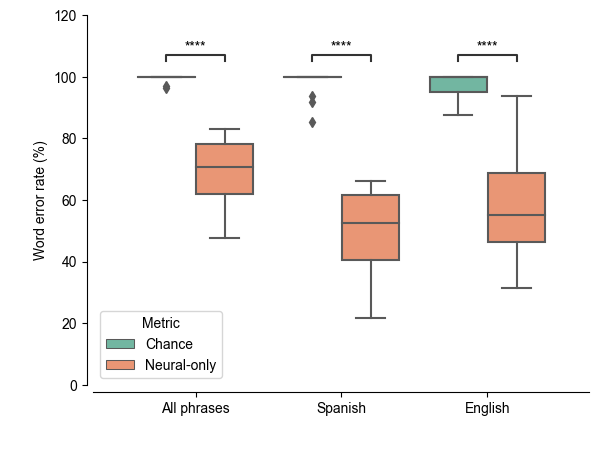

In [7]:
a = sns.color_palette("Set2")#sns.color_palette("Set2")
hex_col = a.as_hex()
a = np.array(a)

fig,ax = plt.subplots()
import seaborn as sns

from statannot import add_stat_annotation



#sns.boxplot(data=df,x='lang',y='WER',hue='Metric',hue_order=['Chance','Neural-only','Real-time'],order=['overall','spanish','english'],ax=ax,palette=a)
#ax.set_ylim([-0.05,1.1])
import matplotlib as mpl
pvalue_thresholds = [[1e-4, "****"], [0.001, "**"], [0.01, "*"], [1, "ns"]]
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 10})#, 'font.sans-serif': 'Arial'})

sns.boxplot(data=df_plot,x='lang',y='WER',hue='Metric',hue_order=['Chance','Neural-only'],ax=ax,order=['overall','spanish','english'],
           palette=a[[0,1]])

test_results = add_stat_annotation(ax, data=df_plot,x='lang',y='WER',hue='Metric',
                                   box_pairs = [ [('overall','Chance'),('overall','Neural-only')],[('spanish','Chance'),('spanish','Neural-only')],
                                                [('english','Chance'),('english','Neural-only')] ], 
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,line_offset=0.12,pvalue_thresholds=pvalue_thresholds)


ax.set_xlabel('')
ax.set_ylabel('Word error rate (%)')
ax.set_ylim([0,120])
ax.set_xticklabels(['All phrases','Spanish','English'])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)
plt.savefig('./figure_E3.jpg',dpi=300)

